# Investigating the role of NCoR1 in experimental colitis in mice

I am using the RNA-seq data from the following paper:

Title: NCoR1 protects mice from dextran sodium sulfate-induced colitis by guarding colonic crypt cells from luminal insult

Authors: Elvira Mennillo, Xiaojing Yang, Miles Paszek, Johan Auwerx, Christopher Benner, and Shujuan Chen

https://www.sciencedirect.com/science/article/pii/S2352345X20300217

## Conditions

There were four conditions: 

* Wild-type (WT) with control (H2O) treatment 
* Wild-type (WT) with dextran sodium sulfate (DSS) treatment
* Knock-out (KO) with control (H2O) treatment 
* Knock-out (KO) with dextran sodium sulfate (DSS) treatment

The knock-out condition was intestinal epithelial cell-specific NCoR1-deficient mice.

## Replicate analysis

Each RNA-seq sample consisted of RNA pooled from 3 mice. 
There were 4 replicates of each condition. 

I started off by analysing the variation between the replicates. 

In [1]:
library(ggplot2)
library(plyr)

# Import data
data <- read.csv("2020_Mennillo_GSE136153_expressionTable.csv", sep = ",", header = TRUE)

# Calculate mean, standard deviation and standard error for each group of 4 replicates
summary <- data.frame("Name" = data$name, 
                      "Transcript" = data$Transcript.RepeatID..cmd.analyzeRepeats.pl.rna.mm9..strand....count.exons..d.WT1.ctrl.RNAseq.160602.WT2.ctrl.RNAseq.160602.WT3.ctrl.RNAseq.160602.WT4.ctrl.RNAseq.160602.WT1.dss.RNAseq.160602.WT2.dss.RNAseq.160602.WT3.dss.RNAseq.160602.WT4.dss.RNAseq.160602.KO1.ctrl.RNAseq.160602.KO2.ctrl.RNAseq.160602.KO3.ctrl.RNAseq.160602.KO4.ctrl.RNAseq.160602.KO1.dss.RNAseq.160602.KO2.dss.RNAseq.160602.KO3.dss.RNAseq.160602.KO4.dss.RNAseq.160602..raw..condenseGenes...cmd.getDiffExpression.pl.raw.txt.wt.wt.wt.wt.wt.dss.wt.dss.wt.dss.wt.dss.ko.ko.ko.ko.ko.dss.ko.dss.ko.dss.ko.dss..export.xxx..AvsA., 
                      "Type" = data$type, 
                      "WT-ctrl-mean" = rowMeans(data[, 10:13]),
                      "WT-ctrl-sd" = apply(data[, 10:13], 1, sd), # 1 specifies row (2 would specify column)
                      "WT-ctrl-se" = apply(data[, 10:13], 1, sd) / 2, # 2 is the square root of the number of items (4)
                      "WT-dss-mean" = rowMeans(data[, 14:17]),
                      "WT-dss-sd" = apply(data[, 14:17], 1, sd),
                      "WT-dss-se" = apply(data[, 14:17], 1, sd) / 2, # 2 is the square root of the number of items (4)
                      "KO-ctrl-mean" = rowMeans(data[, 18:21]),
                      "KO-ctrl-sd" = apply(data[, 18:21], 1, sd),
                      "KO-ctrl-se" = apply(data[, 18:21], 1, sd) / 2, # 2 is the square root of the number of items (4)
                      "KO-dss-mean" = rowMeans(data[, 22:25]),
                      "KO-dss-sd" = apply(data[, 22:25], 1, sd),
                      "KO-dss-se" = apply(data[, 22:25], 1, sd) / 2) # 2 is the square root of the number of items (4)

print(summary)

               Name Transcript           Type WT.ctrl.mean   WT.ctrl.sd
1              Nox1     237038 protein-coding    2167.7200 4.115818e+02
2             Cldn2      12738 protein-coding    4883.7700 3.377893e+02
3              Fut9      14348 protein-coding    1004.4900 2.096899e+02
4              Cdk1      12534 protein-coding    1449.8475 5.282120e+02
5             Top2a      21973 protein-coding    4665.6075 1.866855e+03
6               Otc      18416 protein-coding     420.0025 5.984756e+01
7             Ccna2      12428 protein-coding    2062.3050 9.205886e+02
8              Rrm1      20133 protein-coding    2722.7350 4.990873e+02
9             A4gnt     333424 protein-coding     403.9150 7.478331e+01
10            Cenpf     108000 protein-coding    1174.2525 5.361654e+02
11            Mki67      17345 protein-coding    5929.5550 2.537269e+03
12              Lbp      16803 protein-coding     271.8175 2.689656e+01
13             Lgr5      14160 protein-coding     281.5475 4.964

In [2]:
# For each condition make a new data frame containing the mean, standard deviation and standard error of the 4
# replicates for each transcript
WT_ctrl <- data.frame(as.numeric(summary$WT.ctrl.mean))
WT_ctrl$sd <- as.numeric(summary$WT.ctrl.sd)
WT_ctrl$se <- as.numeric(summary$WT.ctrl.se)
WT_ctrl$Condition <- "WT_ctrl"
colnames(WT_ctrl) <- c("Mean", "sd", "se", "Condition")

WT_dss <- data.frame(as.numeric(summary$WT.dss.mean))
WT_dss$sd <- as.numeric(summary$WT.dss.sd)
WT_dss$se <- as.numeric(summary$WT.dss.se)
WT_dss$Condition <- "WT_dss"
colnames(WT_dss) <- c("Mean", "sd", "se", "Condition")

KO_ctrl <- data.frame(as.numeric(summary$KO.ctrl.mean))
KO_ctrl$sd <- as.numeric(summary$KO.ctrl.sd)
KO_ctrl$se <- as.numeric(summary$KO.ctrl.se)
KO_ctrl$Condition <- "KO_ctrl"
colnames(KO_ctrl) <- c("Mean", "sd", "se", "Condition")

KO_dss <- data.frame(as.numeric(summary$KO.dss.mean))
KO_dss$sd <- as.numeric(summary$KO.dss.sd)
KO_dss$se <- as.numeric(summary$KO.dss.se)
KO_dss$Condition <- "KO_dss"
colnames(KO_dss) <- c("Mean", "sd", "se", "Condition")

# Combine into one long dataframe
all_data <- rbind(WT_ctrl, WT_dss, KO_ctrl, KO_dss)
# Maintain order of conditions
all_data$Condition <- factor(all_data$Condition, levels = c("WT_ctrl", "WT_dss", "KO_ctrl", "KO_dss"))

print(all_data)

             Mean           sd           se Condition
1       2167.7200 4.115818e+02 2.057909e+02   WT_ctrl
2       4883.7700 3.377893e+02 1.688946e+02   WT_ctrl
3       1004.4900 2.096899e+02 1.048450e+02   WT_ctrl
4       1449.8475 5.282120e+02 2.641060e+02   WT_ctrl
5       4665.6075 1.866855e+03 9.334277e+02   WT_ctrl
6        420.0025 5.984756e+01 2.992378e+01   WT_ctrl
7       2062.3050 9.205886e+02 4.602943e+02   WT_ctrl
8       2722.7350 4.990873e+02 2.495437e+02   WT_ctrl
9        403.9150 7.478331e+01 3.739166e+01   WT_ctrl
10      1174.2525 5.361654e+02 2.680827e+02   WT_ctrl
11      5929.5550 2.537269e+03 1.268634e+03   WT_ctrl
12       271.8175 2.689656e+01 1.344828e+01   WT_ctrl
13       281.5475 4.964132e+01 2.482066e+01   WT_ctrl
14       606.7175 2.319096e+02 1.159548e+02   WT_ctrl
15      3337.3525 3.977348e+02 1.988674e+02   WT_ctrl
16      6411.3750 1.697861e+03 8.489304e+02   WT_ctrl
17     17684.7775 5.792592e+03 2.896296e+03   WT_ctrl
18      1399.6600 8.558326e+

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 21473 rows containing non-finite values (stat_ydensity).”


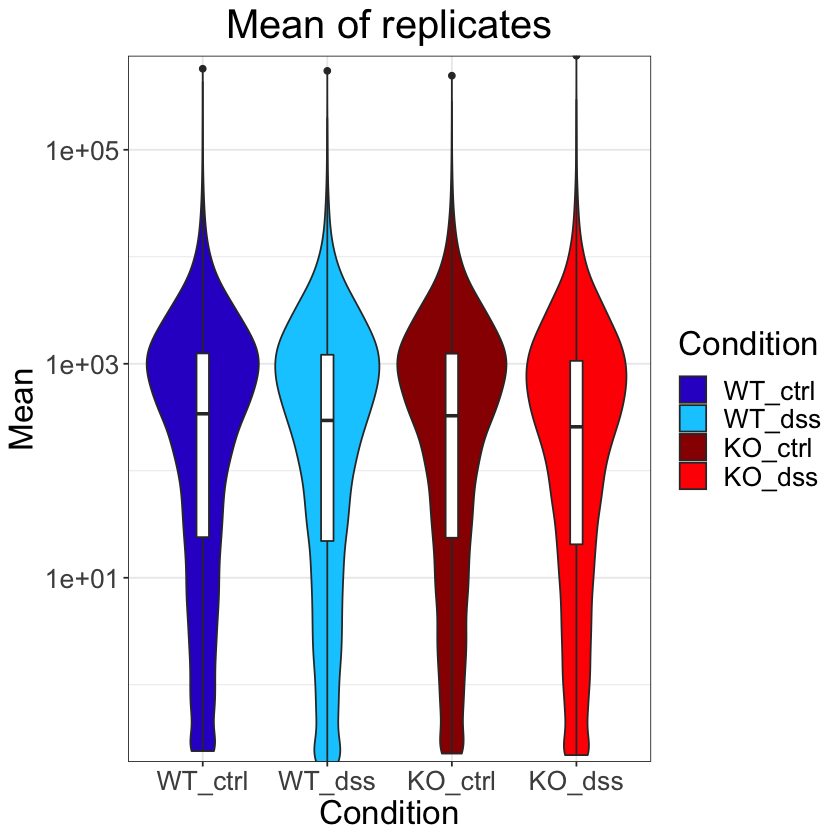

In [3]:
# Plot means
p <- ggplot(all_data, aes(x = Condition, y = Mean, fill = Condition)) + 
  geom_violin() +
  geom_boxplot(width = 0.1, fill = "white", na.rm = TRUE) + 
  theme_bw() + 
  scale_y_continuous(trans="log10", expand = c(0,0)) +
  scale_fill_manual(values = c("#3300CC", "#00CCFF", "#990000", "#FF0000")) + 
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Condition", y = "Mean", title = "Mean of replicates") + 
  theme(text = element_text(size=20))

print(p)

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 21473 rows containing non-finite values (stat_ydensity).”


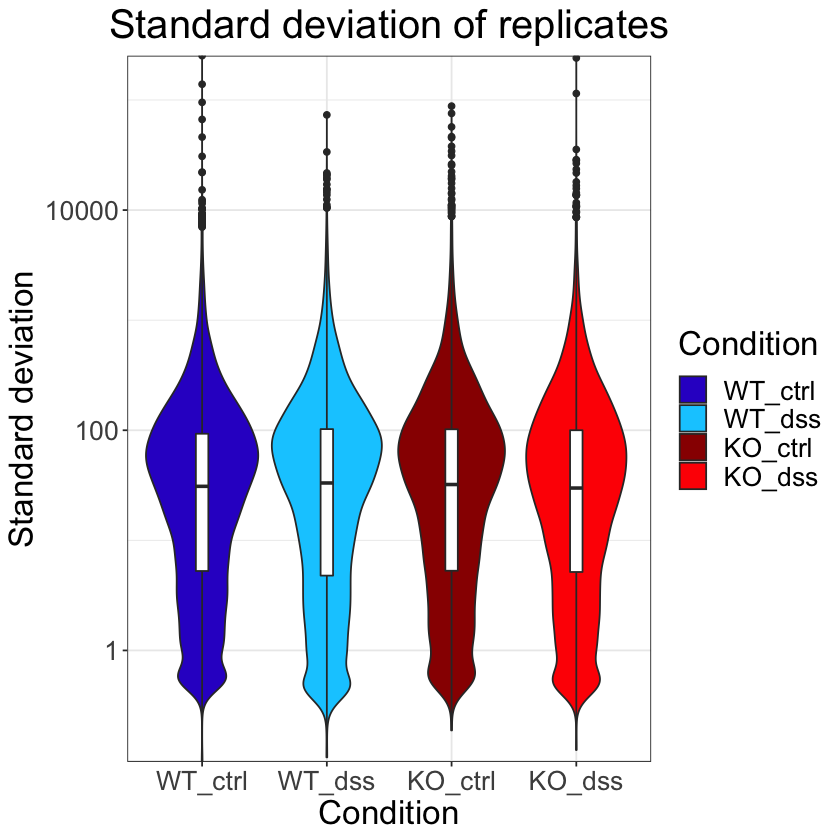

In [4]:
# Plot standard deviations
p <- ggplot(all_data, aes(x = Condition, y = sd, fill = Condition)) + 
  geom_violin() +
  geom_boxplot(width = 0.1, fill = "white", na.rm = TRUE) + 
  theme_bw() + 
  scale_y_continuous(trans="log10", expand = c(0,0)) +
  scale_fill_manual(values = c("#3300CC", "#00CCFF", "#990000", "#FF0000")) + 
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Condition", y = "Standard deviation", title = "Standard deviation of replicates") +
  theme(text = element_text(size=20))

print(p)

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 21473 rows containing non-finite values (stat_ydensity).”


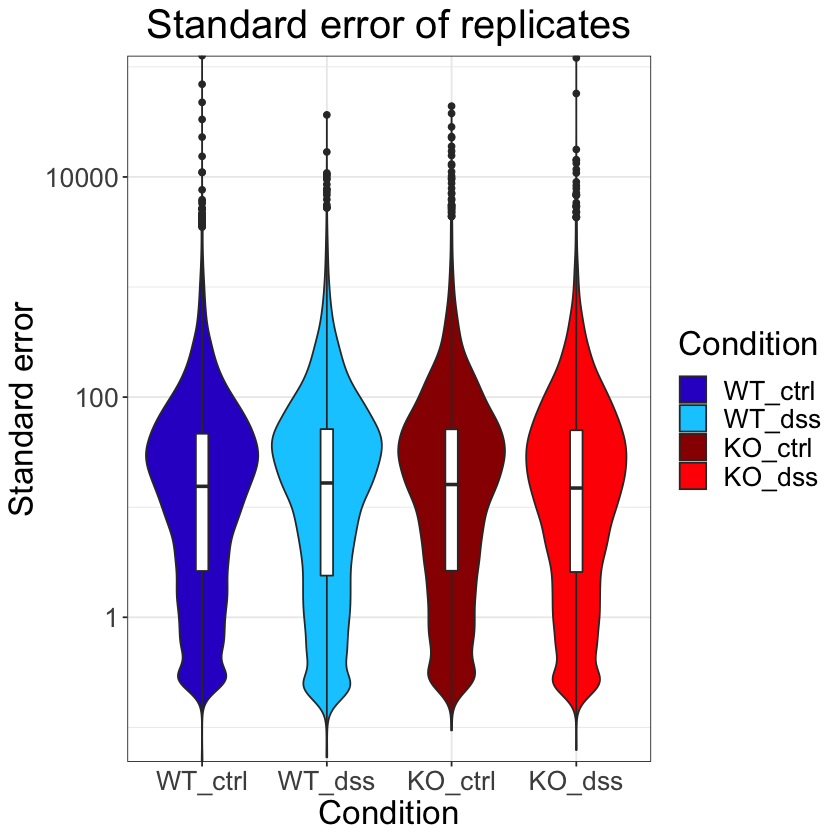

In [5]:
# Print standard errors
p <- ggplot(all_data, aes(x = Condition, y = se, fill = Condition)) + 
  geom_violin() +
  geom_boxplot(width = 0.1, fill = "white", na.rm = TRUE) + 
  theme_bw() +
  scale_y_continuous(trans="log10", expand = c(0,0)) +
  scale_fill_manual(values = c("#3300CC", "#00CCFF", "#990000", "#FF0000")) + 
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Condition", y = "Standard error", title = "Standard error of replicates") +
  theme(text = element_text(size=20))


print(p)

## Interpretation

These graphs show that there is quite a large variation in the standard error however there is similar variation across the  four conditions are behaving very similarly (see figure below)

  Condition     Mean       sd       se
1   WT_ctrl 1087.346 121.5933 60.79667
2    WT_dss 1087.346 111.4645 55.73223
3   KO_ctrl 1087.346 129.0745 64.53724
4    KO_dss 1087.346 126.1448 63.07239


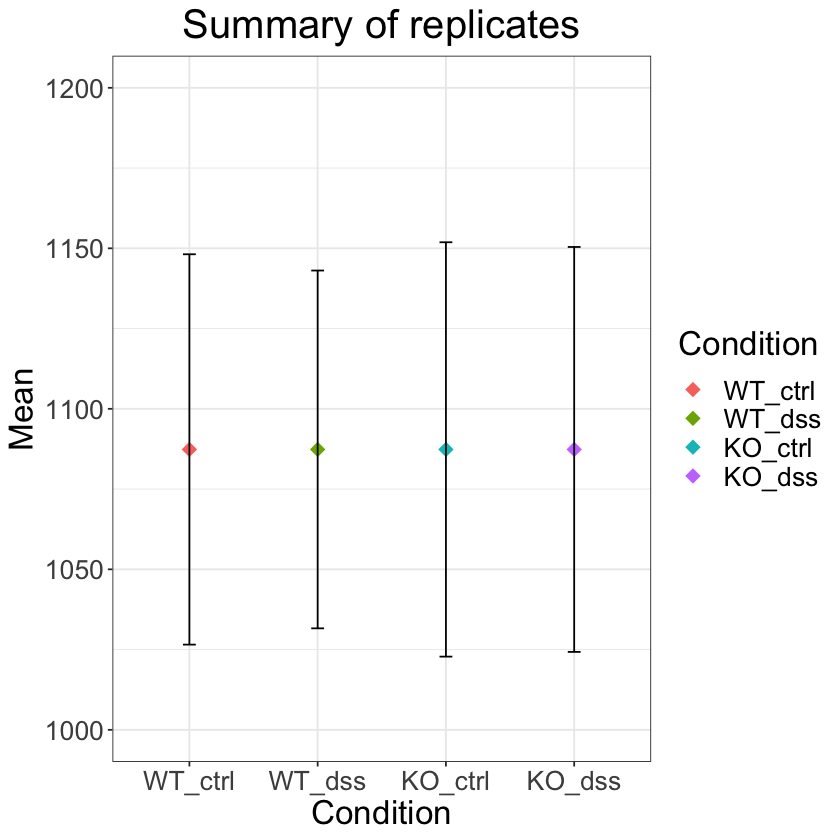

In [6]:
# Plot the mean of the means and standard errors on the same graph
summary_means <- aggregate(all_data[,1:3], by=list(all_data$Condition), FUN = mean)
colnames(summary_means) <- c("Condition", "Mean", "sd", "se")
print(summary_means)

p <- ggplot(summary_means, aes(x = Condition, y = Mean, colour = Condition)) + 
  geom_point(size = 4, shape=18) + 
  geom_errorbar(aes(ymin = Mean - se, ymax = Mean + se), colour = "black", width = 0.1) + 
  theme_bw() +
  ylim(1000,1200) + 
  scale_fill_manual(values = c("#3300CC", "#00CCFF", "#990000", "#FF0000")) + 
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Condition", y = "Mean", title = "Summary of replicates") + 
  theme(text = element_text(size=20))

print(p)